## The Forward Euler Method

Suppose we want to determine the solution $y(t)$ of a differential equation of the form
\begin{equation}
\frac{dy}{dt} = f(y,t)
\end{equation}
where $f(y,t)$ is some function of $y$ and $t$ and we know the value of $y$ at $t=t_0$, $y(t_0)=y_0$. Problems of this sort are known as *initial value* (IV) problems. 

While many IVs have closed form or analytical solutions that we can write down, most do not. Thus, solving these differential equations must be done numerically, with a computer. One of the simplest algorithms for solving such IV problems is the *Forward Euler Method*, which uses the slope of $y(t)$ to determine its value at $y(t+h)$ for small $h$. The approximation made by the Euler method can be understood by writing down the Taylor expansion of $y(t+h)$ to first order. 
\begin{equation}
y(t_n+h) = y(t_n)+h\frac{dy}{dt}|_{t_n} + \mathcal{O}(h^2)
\end{equation}
Thus, we can compute $y(t_n+h)$ given $y(t_n)$ and $\frac{dy}{dt}|_{t_n}$ with the algorithm
\begin{equation}
y_{n+1} = y_n + h f(y_n,t_n)
\end{equation}
which is known as the *Forward Euler method*. Here is an implementation of this algorithm.

In [4]:
import numpy as np

In [5]:
#import the numpy library, we are going to be using numpy arrays for our Euler method solution
def forward_euler(f,t0,tf,y0,dt):
    '''
    Compute the solution for the differential equation 
    dy/dt=f(y,t) using the forward Euler method. 
    
    Args:
        f, a function that takes as its argument floats y, t and returns a float. 
        tf, the final time to integrate our equation too.
        y0, starting value of y(t=0)
        dt, step size. 
    Returns:
        
    '''
    npoints=int((tf-t0)/dt)
    output=np.zeros((npoints,2))#initialize an array to store our outputs 
                                #this numpy array has dimensions npointsx2
    output[0,1]=y0
    output[0,0]=t0
    for n in range(1,npoints):
        output[n,1]=output[n-1,1]+dt*f(output[n-1,1],output[n-1,0]) #find y(t_{n+1})
        output[n,0]=output[n-1,0]+dt #increment time
    return output

The line 
```
np.zeros((npoints,2))
``` 
returns a numpy array with shape (npoints, 2), an npoints$\times$2 matrix in which we will store our times in the first column and our solution in the second column. 

Let's test our function on the equation
\begin{equation}
\frac{dy}{dt}=a\times y
\end{equation}
where $a$ is a constant.

This differential equation can be integrated analytically to give the exponential function
\begin{equation}
y(t)= A e^{a t}
\end{equation}
where $A$ is some constant (fixed by $y(t=0)$ ).

First define our function we want to integrate. 

In [6]:
def f_exp(y,t,a=1.):
    return a*y

When we want to analyze functions, its usually a good idea to plot things. ```matplotlib.pyplot``` is a popular module for plotting numpy arrays. We will also use the magic command ```%matplotlib inline``` which makes sure that are plots display correctly in our notebook. 

## Plotting with matplotlib

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

To make plots, we use the ```plt.plot(x,y,...)``` function. ```plot()``` takes a large number of additional optional arguments after ```x,y```. Some of popular examples include ```label``` which will show up in a legend, ```color``` which sets the line color, ```line-width```, which sets the width of the line, and 

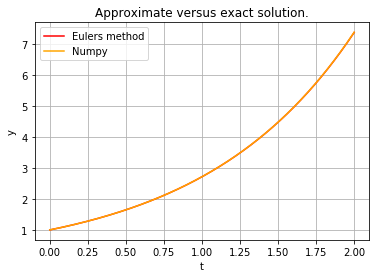

In [8]:
z=forward_euler(f_exp,y0=1.,t0=0.,tf=2.,dt=1e-3)#Solve differential equation with Euler's method. 

plt.plot(z[:,0],z[:,1],label='Eulers method',color='red')#Plot Euler's method solution. 
plt.plot(z[:,0],np.exp(z[:,0]),label='Numpy',color='orange')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title('Approximate versus exact solution.')
plt.legend(loc='best')


It looks like our Euler's method is almost exact agreement with the numpy ```exp()``` function. It's a little hard to tell though so lets look at their fractional difference instead. 

In [9]:
def percent_error(a,b):
    '''
    compute the percent error between a and b
    Args:
        a, float, int, or numpy array
        b, float, int, or numpy array
    Returns:
        the percent error between a and b
    '''
    return 100.*np.abs(1.-a/b)#np.abs(n) calculates the absolute value of a number n

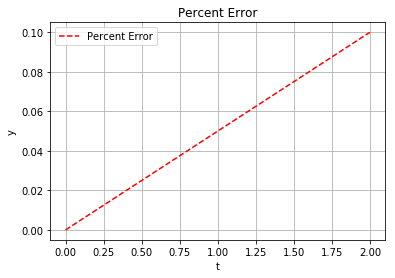

In [10]:
z=forward_euler(f_exp,y0=1.,t0=0.,tf=2.,dt=1e-3)#Solve differential equation with Euler's method. 

plt.plot(z[:,0],100.*np.abs(1.-np.exp(z[:,0])/z[:,1]),
         label='Percent Error',color='red',linestyle='--')#Plot Euler's method solution. 
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title('Percent Error')
plt.legend(loc='best')


It looks like our errors are under 0.1%, Not bad! Now let's see how the error depends on step size. 

(0.0001, 10.0)

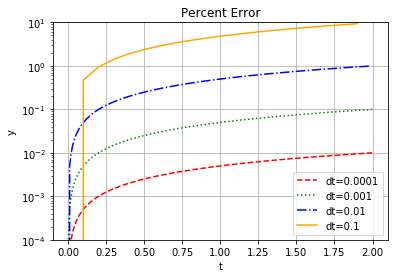

In [11]:
colors=['red','green','blue','orange']
linestyles=['--',':','-.','-']
dts=[1e-4,1e-3,1e-2,1e-1]
for m in range(len(dts)):
    cl=colors[m]
    ls=linestyles[m]
    dt=dts[m]
    z=forward_euler(f_exp,y0=1.,t0=0.,tf=2.,dt=dt)#Solve differential equation with Euler's method. 
    plt.plot(z[:,0],percent_error(np.exp(z[:,0]),z[:,1]),
             label='dt='+str(dt),color=cl,linestyle=ls)#Plot Euler's method solution. 
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title('Percent Error')
plt.legend(loc='best')

plt.yscale('log')
plt.ylim(1e-4,1e1)

As we should expect from our discussion, the percent error increases with increasing step size and is roughly proportional to $dt$. Notice that while for small step sizes our errors are small ($\lesssim 1\%$), they increase with time, building up ```accumulated error``` which after sufficient time can be larger than $100\%$.

## Exercise: Runge Kutta Integrator

In lecture, we learned about the RK4 integrator. Implement a function ```rk4(f,t0,tf,y0,dt)``` where ```f``` is a function that takes as its arguments ```y``` and ```t``` such that 
\begin{equation}
\frac{dy}{dt}=f(y,t),
\end{equation}
```y_0``` is the value of $y(t_0)$ and $dt$ is the step-size. The function should return a numpy array with shape ```(nt,2)``` where ```nt``` is the number of steps between ```tf``` and ```t0```. The first column should contain time-steps that are evenly spaced between ```t0``` and ```tf``` and the second column should contain the RK4 estimate of ```y(t)``` at each value of $t$ in the first column. 

Recall that the RK4 integrator computes $y(t_{n+1})$ from $y_n$ at $t_n$ through
\begin{equation}
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4)
\end{equation}
where
\begin{align}
k_1&=dt f(y_n,t_n) \\
k_2&=dt f(y_n+k_1/2,t_n+dt/2)\\
k_3&=dt f(y_n+k_2/2,t_n+dt/2)\\
k_4&=dt f(y_n=k_3,t_n+dt)
\end{align}

In [12]:
def rk_step(f, tn, yn, dt):
    '''
    Perform algebra at a rungekutta step. 
    Args:
        f, dy/dt = f(y,t)
        tn, current time
        yn, current y
        dt, time step width
    Returns:
        y_n+1 for runge kutta
    '''
    k1 = dt * f(yn, tn)
    k2 = dt * f(yn + k1/2, tn + dt/2.)
    k3 = dt * f(yn + k2/2, tn + dt/2.)
    k4 = dt * f(yn + k3, tn + dt)
    return yn + 1./6. * (k1 + 2 * k2 + 2 * k3 + k4)

def rk4(f, t0, tf, y0, dt):
        '''
        perform Runge Kutta integration (RK4)
        Args: 
            f, function specifying the derivative dy/dt = f(y,t)
            t0, start time for the integrator
            tf, finish time for the integrator
            y0, starting value of y
            dt, step size. 
        Return: 
            nt x 2 numpy array where nt is the number of steps. 
        '''
        nt = int((tf - t0)/dt)
        output = np.zeros((nt, 2))
        output[0,0] = t0
        output[0,1] = y0
        for m in range(1,nt):
            output[m, 0] = output[m-1, 0] + dt
            output[m, 1] = rk_step(f, output[m-1,0], output[m-1,1], dt)
        return output

Now make a plot comparing the percent-error for the RK4 algorithm and the Forward Euler algorithm in solving the equation $dy/dt = 2 y$ between $t=0$ and $t=2$ for step sizes $0.001$,$0.01$ and $0.1$. Plot the percent errors for RK4 as dashed lines and the percent errors for Forward Euler as dotted lines.  

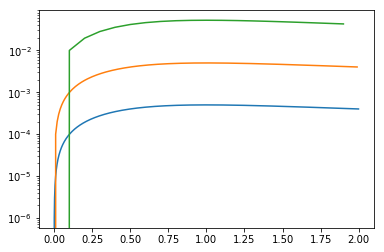

In [16]:
def my_f(t,y):
    return 2 * y

for step_size in [0.001, 0.01, 0.1]:
    rk_output = rk4(my_f, 0, 2, 1, step_size)
    eu_output = forward_euler(my_f, 0, 2, 1, step_size)
    plt.plot(rk_output[:,0], np.abs(rk_output[:,1]/eu_output[:,1] - 1. ))
plt.yscale('log')

The next several sections will require integrating several variables (both velocity and position). Here is a general purpose integrator that can operate on $N$ variables. 

In [102]:
def rk4_step_N(dt, t, y_array, f_list):
    '''
    Args:
        dt, step size
        t, current time
        y_array, previous values of y values (n_steps x n_vars array)
        f_list, list of functions giving first derivatives
    Returns:
        list of y_n+1 for our system of equations
    '''
    nvars = y_array.shape[1]
    y_n1 = np.zeros(nvars)
    for m in range(nvars):
        k1  = dt * f_list[m](t, *y_array[-1])
        k2 = dt * f_list[m](t + dt/2., *(y_array[-1]+k1/2))
        k3 = dt * f_list[m](t + dt/2., *(y_array[-1]+k2/2))
        k4 = dt * f_list[m]( t + dt, *(y_array[-1] + k3))
        y_n1[m] = y_array[-1,m] + (k1 + 2 * k2 + 2 * k3 + k4) / 6. 
    return y_n1

#def verlet_step_N(dt, t, y_array, a_list):
#    '''
#    Args:
#        dt, step size
#        t, current time
#        y_array, previous values of y (n_steps x n_vars array)
#        a_list, list of functions giving the second derivative
#    '''
#    nvars = y_array.shape[1]
#    y_n1 = np.zeros(nvars)
#    for m in range(nvars):
#        dy = 2 * y_array[-1,m] - y_array[-2,m] + dt**2. * a_list[m](t, *y_array[-1])
#        y_n1[m] = y_array[-1,m] + dy
#    return y_n1
        
        
def euler_step_N(dt, t, y_array, f_list):
    '''
    Args:
        dt, step size
        t, current time
        y_array, previous values of y values (n_steps x n_vars array)
        f_list, list of functions giving first derivatives
    Returns:
        list of y_n+1 for our system of equations
    '''
    nvars = len(y_list)
    y_n1 = np.zeros(nvars)
    for m in range(nvars):
        y_n1[m] = y_array[-1,m] + dt * f_list[m](t, *y_array[-1])
    return y_n1

def the_integrator(dt, t0, tf, y0_list, f_list, method):
    '''
    numerically integrate a system of equations given a list of functions for 
    the derivatives.
    Args:
        dt, step size. 
        t0, starting time
        tf, final time
        y0_list, list of initial values [y00, y10, y20, ..., yN0]
        f_list, list of functions giving the first derviative dy_i/dt = f(t, y0, y1, ..., yN)
    Returns:
        nt x (n_variales + 1) numpy array 
    '''
    if method == 'euler':
        step_method = euler_step_N
    if method == 'rk4':
        step_method = rk4_step_N
    if method == 'verlet':
        step_method = verlet_step_N
    
        
    nvars = len(y0_list)
    nt = int((tf-t0)/dt)
    
    output = np.zeros((nt, 1 + nvars))
    
    output[0,0] = t0
    output[0,1:nvars+1] = np.array(y0_list)
    
    if method == 'verlet':
        start_index = 2
    else:
        start_index = 1
    
    for step_num in range(start_index, nt):
        output[step_num,0] = output[step_num-1,0] + dt
        #step_method is a function that takes in (dt, t, y_list, f_list)
        output[step_num,1:nvars+1] = step_method(dt, output[step_num-1, 0], output[:step_num,1:nvars+1] , f_list)
    return output

In [103]:
def f(x,y,z):
    return x + y + z

f(0, *np.array([1,2]))

3

## Exercise: A Block on a Spring

Suppose you have a block on a spring whose position, $x$, obeys the differential equation
\begin{equation}
\ddot{x} = - \frac{k}{m} x
\end{equation}
Solve this equation numerically given intial conditions $x_0$ and $v_0$ using Runge Kutta or Euler's method. Does the conservation of Energy hold? How does it depend on the step-sizes. 


### Solution:

The analytial solution to this equation is well know. 
\begin{equation}
x(t) = x_0 \cos(\omega_0 t + \phi_0)
\end{equation}
where $\omega_0 = \sqrt{k/m}$ and $x_0$ and $\phi_0$ are set by initial conditions for velocity and position.


I choose $\sqrt{k/m} = \omega_0 = 2 \pi$, $x(t=0) = 1 = x_0$ and $\dot{x}(t=0) = 0$ so $\phi_0 = 0$. Under these initial conditions, $x(t) = \cos(2 \pi t)$. 

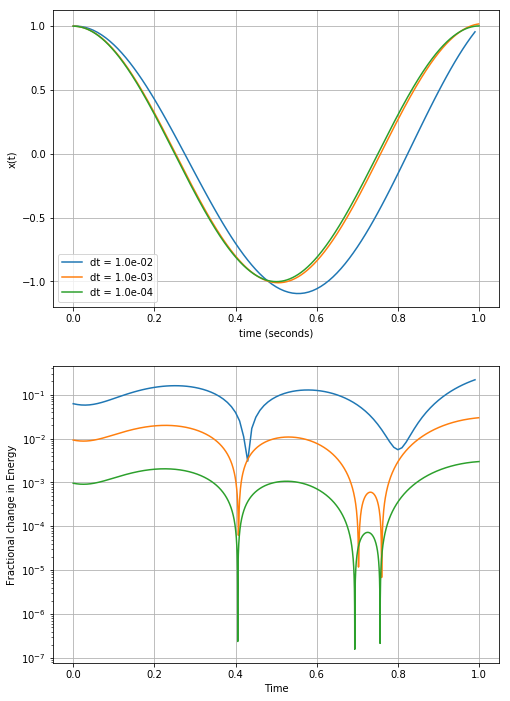

In [150]:
def vel(t, x, v):
    return v

def acc(t, x, v):
    return - (2. * np.pi) ** 2. * x 

#subplots let us put multiple plots in a single figure. 
fig, axarr = plt.subplots(2,1)

for step_size in [0.01, 0.001, 0.0001]:
    results = the_integrator(step_size, 0., 1., [1., 0.], [vel, acc], 'rk4' )
    plt.sca(axarr[0])#this tells matplotlib that to plot on our first subplot
    plt.plot(results[:,0], results[:,1],label='dt = %1.1e'%step_size)
   

    energy = .5 * (results[:, 2] ** 2. + (2. * np.pi * results[:, 1]) ** 2. )

    plt.sca(axarr[1])#this tells matplotlib that to plot energy on our second subplot
    plt.plot(results[:,0], np.abs(energy-np.mean(energy))/np.mean(energy),label='dt = %1.1e'%step_size)
    
    
plt.sca(axarr[0])
plt.legend()
axarr[0].set_xlabel('time (seconds)')
axarr[0].set_ylabel('x(t)')
axarr[1].set_ylabel('Fractional change in Energy')
axarr[1].set_xlabel('Time')
axarr[1].set_yscale('log') #set the y-scale of our energy conservation plot to be y-scale. 
axarr[1].grid()
plt.gcf().set_size_inches(8,12)
plt.grid()
plt.show()

The fractional energy conservation plot shows that energy is conserved at the 10%, 3%, and 0.3% level over a single period with a step size of 0.01, 0.001, 0.0001. Notice that the large step size disagrees significanlty with the smaller step sizes. This is why its important to check if your results converge. If things are working, changing the step size by a factor of a few should not significantly effect the trajectory of your integrator. If they do, you should reduce the step size or use a better integrator. 

## Exercise: Pendulum.

The equation of motion for a pendulum is 
\begin{equation}
\ddot{\theta} = - \frac{g}{\ell} \sin \theta
\end{equation}
Plot $\theta(t)$ for various times. Compare this to the solution when $\theta << 1$ which gives simple harmonic motion. Plot the Pendulum on the surface of Earth and Jupiter with a length of $\ell=1$. Start the Pendulum at $\theta_0=0.99 \times \pi$ and $\dot{\theta}_0=0$

### Solution:

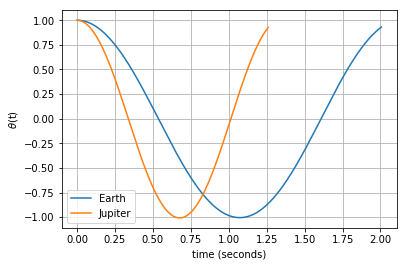

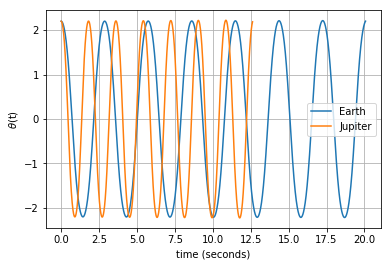

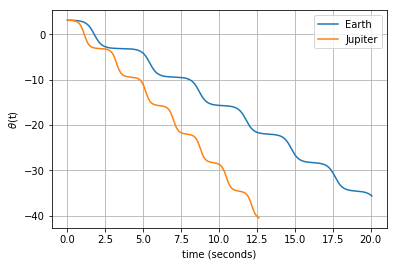

In [167]:
def vel(t, x, v):
    return v

def acc(t, x, v, g):
    return - g * np.sin(x)

#you can declare functions on the go with lambda declarations. 
#This is an example! We an use a single function acc to define
#two more functions where g is fixed for two different values. 
acc_earth = lambda t, x, v: acc(t, x, v, 9.8)
acc_jupiter = lambda t, x, v: acc(t, x, v, 24.79) #the acceleration of gravity at jupiters surface is 24.79 m/s^2
                                                  #according to wikipedia. 

    
#I integrate the functions over what should be a single period. If they return to their starting positions 
# at the final time-step, this means I've probably done things correctly. T = 2 x pi x sqrt(L/g).

results_earth = the_integrator(0.001, 0., 2. * np.pi * np.sqrt(1./9.8), [1., 0.], [vel, acc_earth], 'rk4' )
results_jupiter = the_integrator(0.001, 0., 2. * np.pi * np.sqrt(1./24.79), [1., 0.], [vel, acc_jupiter], 'rk4' )



plt.plot(results_earth[:,0], results_earth[:,1], label = 'Earth')
plt.plot(results_jupiter[:,0], results_jupiter[:,1], label = 'Jupiter')

plt.xlabel('time (seconds)')
plt.ylabel('$\\theta$(t)')
plt.legend()
plt.grid()
plt.show()


#We know that simple harmonic motion only happens when $\theta_0 << \pi/2$. Next we try 0.7 * \pi

results_earth = the_integrator(0.0001, 0., 20. * np.pi * np.sqrt(1./9.8), [.7 * np.pi, 0.], [vel, acc_earth], 'rk4' )
results_jupiter = the_integrator(0.0001, 0., 20. * np.pi * np.sqrt(1./24.79), [.7 * np.pi, 0.], [vel, acc_jupiter], 'rk4' )


plt.plot(results_earth[:,0], results_earth[:,1], label = 'Earth')
plt.plot(results_jupiter[:,0], results_jupiter[:,1], label = 'Jupiter')

plt.xlabel('time (seconds)')
plt.ylabel('$\\theta$(t)')
plt.grid()
plt.legend()
plt.show()

#We know that simple harmonic motion only happens when $\theta_0 << \pi/2$. Next we try 0.99 * \pi

results_earth = the_integrator(0.0001, 0., 20. * np.pi * np.sqrt(1./9.8), [.99 * np.pi, 0.], [vel, acc_earth], 'rk4' )
results_jupiter = the_integrator(0.0001, 0., 20. * np.pi * np.sqrt(1./24.79), [.99 * np.pi, 0.], [vel, acc_jupiter], 'rk4' )



plt.plot(results_earth[:,0], results_earth[:,1], label = 'Earth')
plt.plot(results_jupiter[:,0], results_jupiter[:,1], label = 'Jupiter')

plt.xlabel('time (seconds)')
plt.ylabel('$\\theta$(t)')
plt.grid()
plt.legend()
plt.show()


Notice that when the position starts at 0.99 $\pi$, the pendulum does not return to its original position! Why? 

Beause integration errors accumulate and lead to a violation in the conservation of energy, the pendulum aquires enough energy to go all the way past $\theta = -\pi$. Clearly one needs to be careful about errors like this when trying to interpret simulated dynamics. A family of integrators know as symplectic integrators are better at conserving energy. 

## Exercise: 2d Block on a Spring

Do the same, but now the block is free to move in two dimensions. The equations of motion in two dimensions are
\begin{equation}
m \ddot{x} = -k_x x
\end{equation}

\begin{equation}
m \ddot{y} = -k_y y
\end{equation}
Solve these differential equations for the initial conditions $v_{0x}, v_{0y}, x_0, y_0$ and plot orbits for various values of $k_x$ and $k_y$. What happens when $k_x \neq k_y$. 

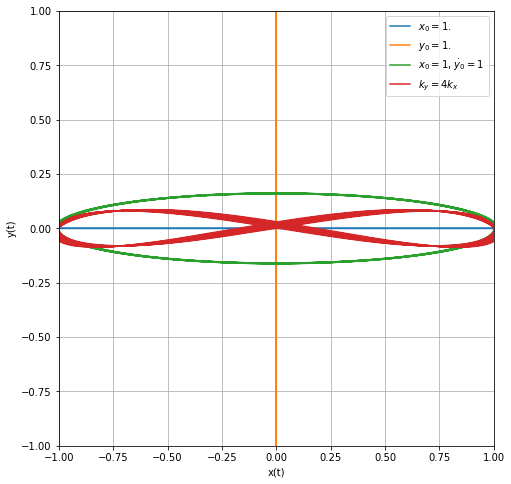

In [174]:
def velx(t, x, vx, y, vy):
    return vx

def vely(t, x, vx, y, vy):
    return vy

def ax(t, x, vx, y, vy):
    return - (2. * np.pi ) ** 2. * x

def ay(t, x, vx, y, vy):
    return - (2. * np.pi ) ** 2. * y 


results_no_y = the_integrator(0.0001, 0., 10., [1., 0., 0., 0.], [velx, ax, vely, ay], 'rk4' )
results_no_x = the_integrator(0.0001, 0., 10., [0., 0., 1., 0.], [velx, ax, vely, ay], 'rk4' )
results_velocity_y = the_integrator(0.0001, 0., 10., [1., 0., 0., 1.], [velx, ax, vely, ay], 'rk4')

#now adjust k_y

def ay(t, x, vx, y, vy):
    return - 4 * (2. * np.pi ) ** 2. * y 

results_velocity_y_diff_ky = the_integrator(0.0001, 0., 10., [1., 0., 0., 1.], [velx, ax, vely, ay], 'rk4')

plt.plot(results_no_y[:,1], results_no_y[:,3], label = '$x_0 = 1$.')
plt.plot(results_no_x[:,1], results_no_x[:,3], label = '$y_0 = 1$.')
plt.plot(results_velocity_y[:,1], results_velocity_y[:,3], label = '$x_0 = 1$, $\dot{y}_0 = 1$')
plt.plot(results_velocity_y_diff_ky[:,1], results_velocity_y_diff_ky[:,3], label = '$k_y = 4 k_x$')

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.gca().set_aspect('equal')
plt.gca().set_ylim(-1., 1.)
plt.gca().set_xlim(-1., 1.)
plt.grid()
plt.legend()
plt.gcf().set_size_inches(8,8)
plt.show()


Since $k_y = \omega_{y0}^2$, setting $k_y  = \alpha k_x$ will adjust the frqeuency of harmonic motion in the $\hat{y}$ direction to be $\sqrt{\alpha}$ that in the $x$ direction. Indeed, when a single orbit is completed in the $\hat{x}$ direction, two orbits are completed in the $\hat{y}$ direction when $k_y = 4 k_x$. 